# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 12 </span>
## <span style="color:orange"> Keras - Deep & Convolutional Neural Network image recognition </span>

### MNIST with Keras

The goal of exercise 12 is to use deep neural network models, implemented in the Keras python package, to recognize and distinguish between the ten handwritten digits (0-9).

The MNIST dataset comprises $70000$ handwritten digits, each of which comes in a square image, divided into a $28\times 28$ pixel grid. Every pixel can take on $256$ gradation of the gray color, interpolating between white and black, and hence each data point assumes any value in the set $\{0,1,\dots,255\}$. Since there are $10$ categories in the problem, corresponding to the ten digits, this problem represents a generic **classification task**. 

## Exercise 12.1

In [44]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [45]:
from tensorflow.keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
#such a division is given by keras and this library: 6000 for training and 1000 for test
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape) #X is the input and the input are images 28x28
print('Y_train shape:', Y_train.shape) #Y is the output and the output is a single number
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples') #X_test( or test).shape is a tuple which contains: number of images and dimensions x and y

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
60000 train samples
10000 test samples


an example of a data point with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


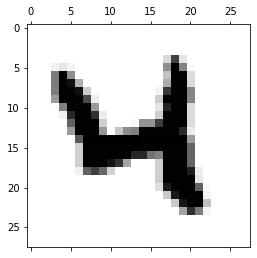

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [46]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols) #create a vector reshaping the data.
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols) # these vectors are matrices made of 60000 or in turn 10000 vectors 
#made of 28x28=784 elements

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255# the value in the gray scale are now values in [0,1]

# Express labels in categorical notation
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_DNN(optimizer):
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [51]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam
def compile_model():
    # create the model
    model=create_DNN('sgd')
    # compile the model choosing optimizer, loss and metrics objects
    model.compile(loss=keras.losses.categorical_crossentropy,
                  #optimizer=SGD(),
                  optimizer = Adam(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


We show some results obtained with different optimizers.

N.B. You have to recompile this box changing the optimizer in order to compile the below boxes with the results of different optimizers

In [52]:
# training parameters
batch_size = 32
epochs = 15

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2832 - acc: 0.9172 - val_loss: 0.1060 - val_acc: 0.9684
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1202 - acc: 0.9659 - val_loss: 0.0911 - val_acc: 0.9712
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0883 - acc: 0.9736 - val_loss: 0.0730 - val_acc: 0.9773
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0690 - acc: 0.9797 - val_loss: 0.0731 - val_acc: 0.9781
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0554 - acc: 0.9829 - val_loss: 0.0787 - val_acc: 0.9793
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0472 - acc: 0.9854 - val_loss: 0.0856 - val_acc: 0.9791
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0411 - acc: 0.9873 - val_loss: 0.0879 - val_acc: 0.9793
Epoch 8/15
1875/1875 [==============================] - 5s 3ms

## Adam

313/313 [==============================] - 1s 2ms/step - loss: 0.1048 - acc: 0.9795

Test loss: 0.10483195632696152
Test accuracy: 0.9794999957084656


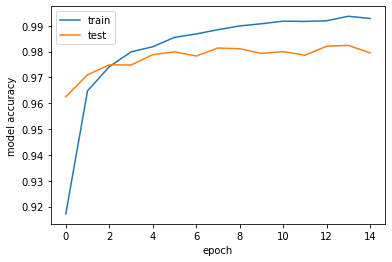

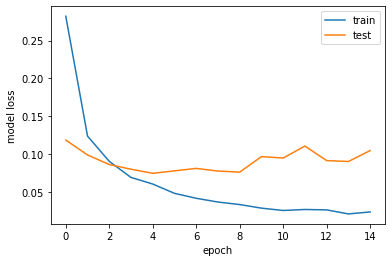

In [33]:
# evaluate model with optimizer Adadelta
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## AdaDelta

313/313 [==============================] - 0s 1ms/step - loss: 0.1048 - acc: 0.9795

Test loss: 0.10483195632696152
Test accuracy: 0.9794999957084656


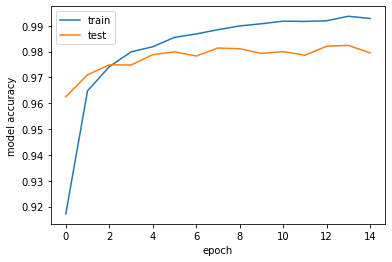

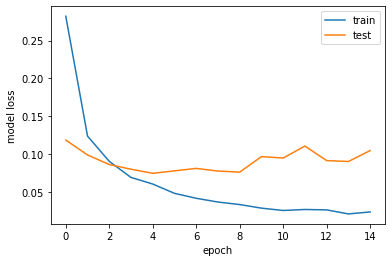

In [50]:
# evaluate model with optimizer Adadelta
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## SGD

313/313 [==============================] - 1s 2ms/step - loss: 0.0955 - acc: 0.9822A: 0s - loss: 0.1433 - acc: 0

Test loss: 0.09554441273212433
Test accuracy: 0.982200026512146


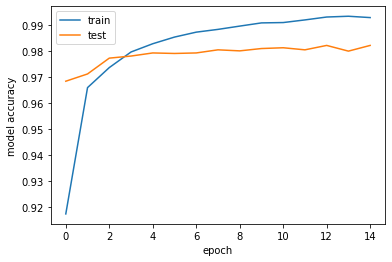

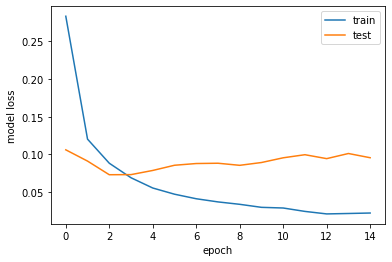

In [53]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Dropout, during training, slices off some artificial neurons, thus, training accuracy suffers.

Dropout, during testing, turns itself off and allows all of the ‘weak classifiers’ in the neural network to be used. Thus, testing accuracy improves with respect to training accuracy.

### Exercise 12.2

In [54]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_CNN():
    # instantiate model
    model = Sequential()
            
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), 
                           strides=2, padding="valid", 
                           data_format=None))
    model.add(Conv2D(16, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), 
                           strides=2, padding="valid", 
                           data_format=None))
    #model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))

    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['acc'])
    return model

## SGD

Epoch 1/7
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2036 - acc: 0.9394 - val_loss: 0.0565 - val_acc: 0.9818
Epoch 2/7
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0670 - acc: 0.9815 - val_loss: 0.0401 - val_acc: 0.9869
Epoch 3/7
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0481 - acc: 0.9863 - val_loss: 0.0342 - val_acc: 0.9902
Epoch 4/7
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0412 - acc: 0.9888 - val_loss: 0.0356 - val_acc: 0.9894
Epoch 5/7
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0331 - acc: 0.9908 - val_loss: 0.0269 - val_acc: 0.9903
Epoch 6/7
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0274 - acc: 0.9919 - val_loss: 0.0375 - val_acc: 0.9907
Epoch 7/7
313/313 [==============================] - 1s 4ms/step - loss: 0.0419 - acc: 0.9879

Test loss: 0.04194206744432449
Test accuracy: 0.9879000186920166


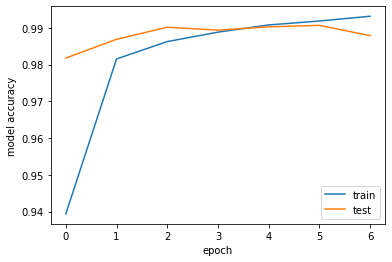

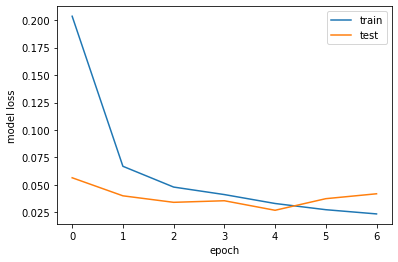

In [56]:
# training parameters
batch_size = 32
epochs = 7

# create the deep conv net
model_CNN=create_CNN()

# train CNN
my_history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(my_history.history['acc'])
plt.plot(my_history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(my_history.history['loss'])
plt.plot(my_history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## Adam

Epoch 1/7
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2319 - acc: 0.9300 - val_loss: 0.0596 - val_acc: 0.9813
Epoch 2/7
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0781 - acc: 0.9779 - val_loss: 0.0525 - val_acc: 0.9837
Epoch 3/7
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0547 - acc: 0.9847 - val_loss: 0.0339 - val_acc: 0.9892
Epoch 4/7
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0444 - acc: 0.9873 - val_loss: 0.0412 - val_acc: 0.9882
Epoch 5/7
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0359 - acc: 0.9901 - val_loss: 0.0356 - val_acc: 0.9894
Epoch 6/7
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0308 - acc: 0.9908 - val_loss: 0.0308 - val_acc: 0.9915
Epoch 7/7
313/313 [==============================] - 2s 5ms/step - loss: 0.0353 - acc: 0.9905

Test loss: 0.03530647233128548
Test accuracy: 0.9904999732971191


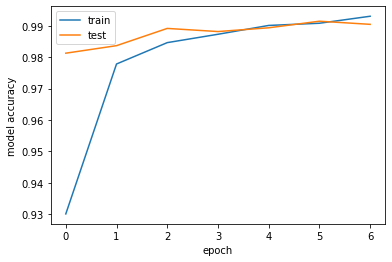

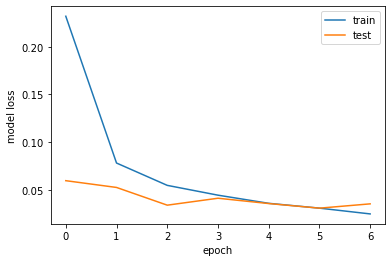

In [36]:
# training parameters
batch_size = 32
epochs = 7

# create the deep conv net
model_CNN=create_CNN()

# train CNN
my_history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(my_history.history['acc'])
plt.plot(my_history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(my_history.history['loss'])
plt.plot(my_history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## Exercise 12.3

Now, we can use our CNN to recognize our hand-written digits.

Image size: 28x28


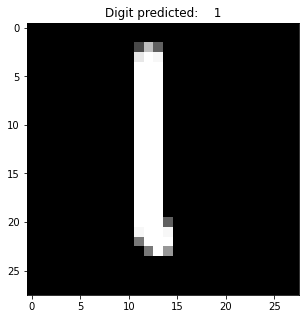

Image size: 28x28


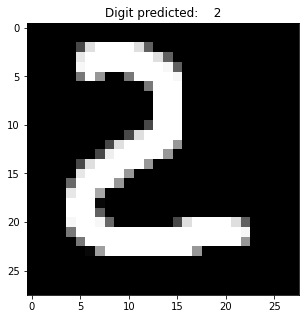

Image size: 28x28


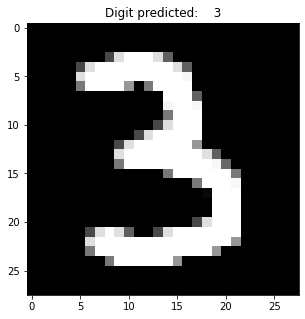

Image size: 28x28


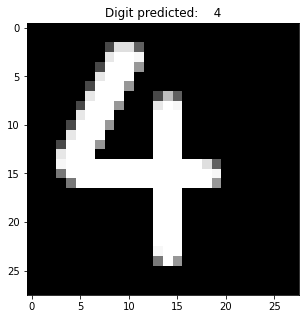

Image size: 28x28


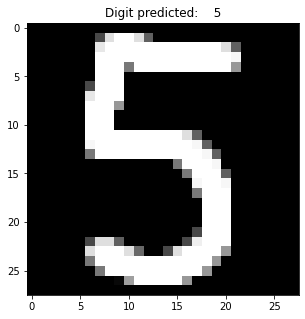

Image size: 28x28


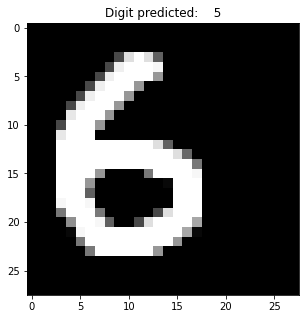

Image size: 28x28


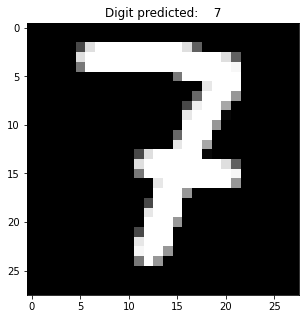

Image size: 28x28


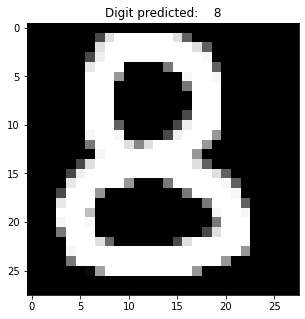

Image size: 28x28


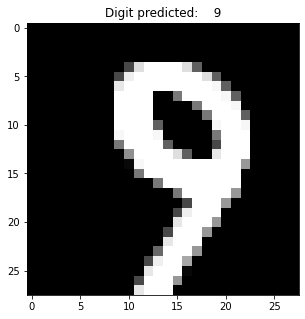

In [41]:
from PIL import Image
import os

for i in range(9):
    digit_filename = "./numeri/" + str(i+1) + ".png"
    digit_in = Image.open(digit_filename).convert('L')
#digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

    ydim, xdim = digit_in.size
    print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    #pred_0 = model_CNN.predict(data)
    #plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
#print(data)
#print(X_train[0])

    plt.figure(figsize=(5,5))
    plt.imshow(data, cmap='gray')
    data = data.reshape(1,xdim,ydim)
    pred_0 = model_CNN.predict(data)
    data = data.reshape(xdim,ydim)
    plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
    plt.show()

Our CNN is able to predict all the digits except for the 6.